In [57]:
#!pip install panel

In [4]:
import pandas as pd
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
import panel as pn

In [8]:
df_weather=pd.read_csv('weather.csv')
df=df_weather.copy()

In [9]:
#conveting to datetime format and dropping rows without dates
df=df.dropna(subset=['Päivämäärä'])
df['Päivämäärä']=pd.to_datetime(df['Päivämäärä'],format="%d/%m/%Y")
df['month']=df['Päivämäärä'].dt.month
df['year']=df['Päivämäärä'].dt.year
df['day']=df['Päivämäärä'].dt.day
df['month']=df['month'].astype(int)


my_dict={'-':np.nan,'nan':np.nan}
df['Lämpötila']=df['Lämpötila'].replace(my_dict)
df['Lämpötila']=df['Lämpötila'].astype(int,errors='ignore')


#getting today's date and corresponding month
today=date.today()
today_day=today.day
today_month=today.month

In [14]:
df['Lämpötila'].unique()

array(['21', '20', '8', nan, '15', '17', '18', '10', '25', '24', '22',
       '14', '13', '3', '5', '6', '11', '9', '7', '19', '16', '23', '12',
       '26', '2', '0', '-2', '1', '-4', '-3', '-13', '-6', '-5', '-17',
       '-18', '-23', '-7', '-9', '-10', '-1', '-8', '-28', '-30', '-12',
       '-22', '-14', '-20', '-16', '-33', '-36', '-21', '-24', '-15', '4',
       '-25', '28', '30', '32', '31', '27', '-11', '-19', '-26', '-35',
       '-29', '-27', '29', '-31', '-32', '-34', '-37', '-5.6', '-2.5',
       '-1.9', '-7.6', '-1.3', '-5.5', '-1.5', '-0.5', '-1.4', '-0.8',
       '-5.4', '2.5', '-8.7', '-6.7', '-34.4', '-29.7', '1.9', '-1.2',
       '-13.3', '-9.2', '9.8', '-3.5', '2.3', '0.5', '0.8', '3.5', '-4.5',
       '0.4', '-1.8', '-9.5', '-7.2', '1.5', '2.2', '-18.5', '-8.5',
       '-6.5', '-6.9', '0.3', '-0.3', '2.9', '4.5', '8.5', '-8.4', '-7.5',
       '-7.8', '-2.4', '2.6', '-4.8', '-1.6', '-4.2', '1.3', '-6.4',
       '-5.8', '-15.5', '-23.5', '-30.8', '22.5', '13.5', '12.

In [10]:
df_temp=df[(df['month']==today_month) & (df['day']==today_day)]
df_temp.head()

,Päivämäärä,Aamu lämpötila,Iltalämpötila,Lämpötila,Vesisadetta,Lumisadetta,Räntäsade,Ukkosta,Pilvistä,Puoli-pilvistä,Aurinkoista,Kova tuuli,Kylmä tuuli,Myrsky,Muita havaintoja,month,year,day
361,1994-04-27,NaN,NaN,10,False,False,False,False,False,False,False,False,FALSE,False,NaN,4,1994,27
726,1995-04-27,-4,NaN,NaN,False,False,False,False,False,False,False,False,FALSE,False,NaN,4,1995,27
1092,1996-04-27,NaN,NaN,0,False,False,False,False,False,False,False,False,FALSE,False,NaN,4,1996,27
1457,1997-04-27,NaN,NaN,4,False,False,False,False,False,False,True,False,TRUE,False,NaN,4,1997,27
1822,1998-04-27,4,12.0,NaN,False,False,False,False,False,False,False,False,FALSE,False,NaN,4,1998,27


361     1994
1092    1996
1457    1997
2187    1999
2918    2001
3283    2002
4744    2006
Name: year, dtype: int32 726     1995
1822    1998
2553    2000
3648    2003
4014    2004
4379    2005
Name: year, dtype: int32


<function matplotlib.pyplot.show(close=None, block=None)>

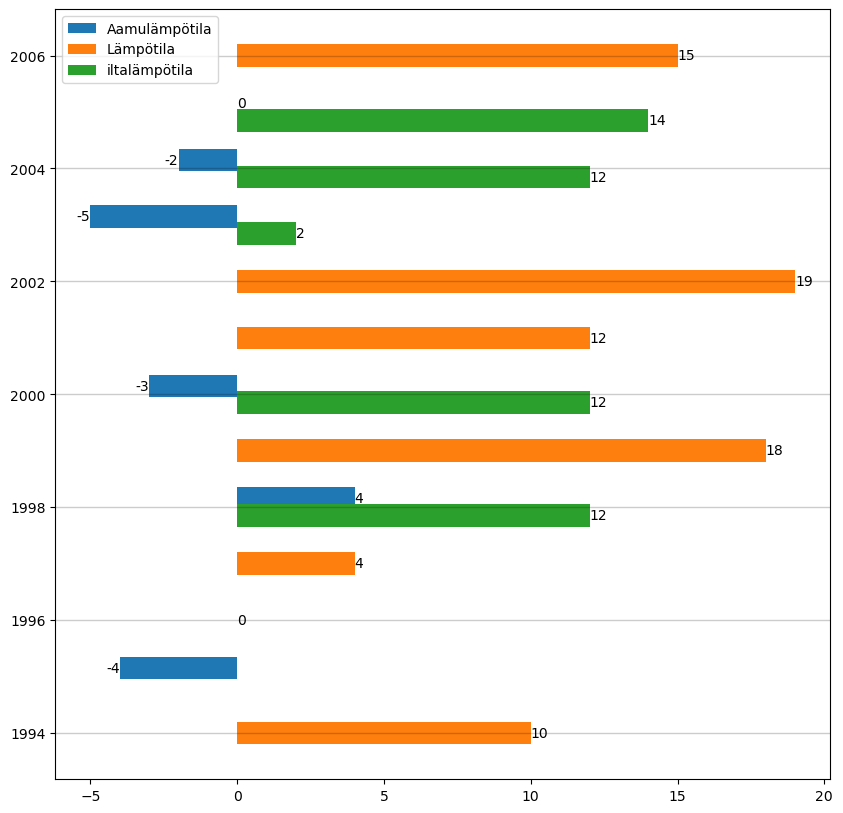

In [56]:
#df_temp.plot(x='year', y='Lämpötila',kind='bar')
#df_temp['year']=df_temp['year'].astype(str)
#Lampotila
plt.figure(figsize=(10,10))
temperature_df=df_temp.dropna(subset='Lämpötila')
year=temperature_df['year']
lampotila=temperature_df['Lämpötila'].astype(int)


#aamulampotila
aamu_df=df_temp.dropna(subset='Aamu lämpötila')
year_aamu=aamu_df['year']
aamulampotila=aamu_df['Aamu lämpötila'].astype(int)

#iltalampotila
ilta_df=df_temp.dropna(subset='Iltalämpötila')
year_ilta=ilta_df['year']
iltalampotila=ilta_df['Iltalämpötila'].astype(int)

print(year,year_aamu)
#plt.barh(year-0.2, lampotila,label='Lämpötila')
plt.bar_label(plt.barh(year_aamu+0.15, aamulampotila,0.4, label='Aamulämpötila'))
plt.bar_label(plt.barh(year, lampotila,0.4,label='Lämpötila'))
plt.bar_label(plt.barh(year_ilta-0.15, iltalampotila,0.4,label='iltalämpötila'))

#plt.yticks(df_temp['year'])
plt.legend()
plt.grid(color='black', linewidth=1, axis='y', alpha=0.2)
plt.show
#plt.plot(df_temp['year'],df_temp['Lämpötila'])
#fig, ax = plt.subplots(figsize =(16, 9))
#ax.barh(year,temperature)

In [11]:
def get_plot(df_temp):
    plt.figure(figsize=(10,10))
    temperature_df=df_temp.dropna(subset='Lämpötila')
    year=temperature_df['year']
    lampotila=temperature_df['Lämpötila'].astype(int)


    #aamulampotila
    aamu_df=df_temp.dropna(subset='Aamu lämpötila')
    year_aamu=aamu_df['year']
    aamulampotila=aamu_df['Aamu lämpötila'].astype(int)
    
    #iltalampotila
    ilta_df=df_temp.dropna(subset='Iltalämpötila')
    year_ilta=ilta_df['year']
    iltalampotila=ilta_df['Iltalämpötila'].astype(int)

    #plt.barh(year-0.2, lampotila,label='Lämpötila')
    plt.bar_label(plt.barh(year_aamu+0.15, aamulampotila,0.4, label='Aamulämpötila'))
    plt.bar_label(plt.barh(year, lampotila,0.4,label='Lämpötila'))
    plt.bar_label(plt.barh(year_ilta-0.15, iltalampotila,0.4,label='iltalämpötila'))

    #plt.yticks(df_temp['year'])
    plt.legend()
    plt.grid(color='black', linewidth=1, axis='y', alpha=0.2)
    plt.show

In [21]:
pn.extension()
bound_plot = get_plot(df_temp)
pn.template.MaterialTemplate(
    site="Panel",
    title="Getting Started App",
    main=[bound_plot],
).servable()
panel serve app.ipynb --autoreload

SyntaxError: invalid syntax (464770758.py, line 8)

In [19]:
panel serve app.ipynb --autoreload

SyntaxError: invalid syntax (3272685888.py, line 1)